<a href="https://colab.research.google.com/github/Feliperojas2601/Lucipher/blob/main/AES/jrojasce_Lab7AES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 7 - AES  
Por: Felipe Rojas Cendales  
UNAL | Introducción a la criptografía y la seguridad de la información

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyaes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26363 sha256=37e444918b9fb50bc60917e1e2cdcd3132cc1474166105a27d6f0e981b226997
  Stored in directory: /root/.cache/pip/wheels/42/a3/7d/73d60820adb58d818179cdec3fc1be66f6f7453513a3ff0b05
Successfully built pyaes


Enter your key size: 128 bits, 192 bits or 256 bits: 128
The key:  b'\x9b\x03\xa8\xdd\xdc\xa6\x1e*\xf2\x10\xeb\x84\xc9\xaey\x9e'

Original image:


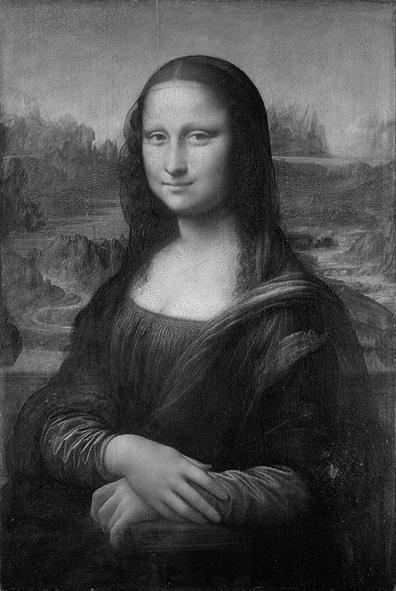


Encrypted image:  b'U\x96\x92l\xe5\xec\xbc,\xc0mP\x03\xd8Bb\xbe?!\xce\xa2U\xf7\xe7q\xcf\xc0\xe0j[QS\x0e\xcb=\xf3s\x89\x81\xa0\xce\xeb!\x89B\xf4\x0f\xf1\xbc\xe6`\xa7+>\x9f\xf3I\x04\xf3>\xae}\xdbH\x96\xeb\xb9\x0caT9\'g\xe3\xa7\xac\x82\xba?\x99J\xcc\xb8\xe3\x16\xd5VB\'f9\xd8\xb1%h\x8cz\xef\x97\xd9\x0b\x07>\x1d9y\x1e\xafO\x9c\x16\xe3T 5\x00\xce\x1f\x8fQ\xf0\xffu\xd0m^\x7f\xc0\x08W\x99\xea\x85\'\xb3q\x1f1\xbd"\xbb\xcf\x85\xe5\x84m\x1e\xd1\xa1\x14\'\x82O\xfe\xcd\xed\xff\x86\xa0f\xb3\x11\x14\xf9\xb8\xfa\xd9]\xdbh\x907<F\x92vi\xbe\xed\xf11\x15;=\xd6c\x00u\xa3b\xd6g2\xeaH\xa47\xacRH\xedQ\x13\xe5\xdff\x16\xb3\xdc\xac\xd4m\x11!\xde\xfa\x91\xbc\xd7W\x80\x12\x1f\xb5\xdft>\x13\n\xb20\xce\xb0%\xd6\xa5\xfc8^\x0f\x0f\xfe`\x91|5C\xc5(X\xedh\xa7n\nh\xcd\xdd\xb0\x132H\x90l@:!\x84I\xb6]\x99\x93xh<u\xdd\x07\xed\xb1\xc4\xe5\xe2\x02\xf1\x96\xabj\xbah\xb4L\xb1\xf4}\xc7\xad\x868w\xc7\xab[N\x11?3#\xe5\x83SR\x19\x97Oc*\xc2\xebqk\x1e\x95d\x91\x0e\xf0\x8c/\xa61\xced`\x84*\xed\xf7\xe5\xdf\xb9\xbb\x13\xaci~B\x80\xd1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


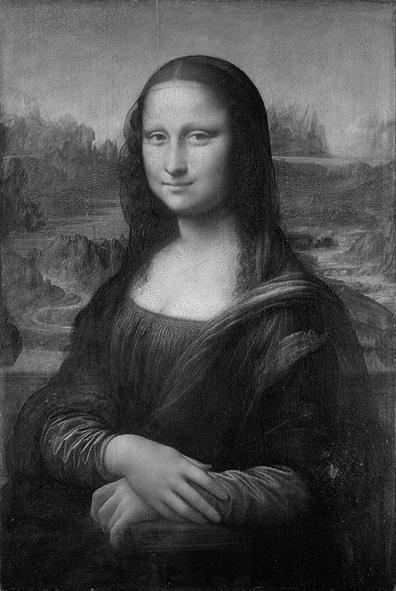

In [8]:
import numpy as np
import cv2
import pyaes
import os
import base64
from google.colab.patches import cv2_imshow

def encrypt(image, pyAesKey): 

  return pyAesKey.encrypt(image)

def decrypt(image, pyAesKey): 

  return pyAesKey.decrypt(image)

def aes():

  #Receive key size 128 bits, 192 bits or 256 bits
  keySize = input('Enter your key size: 128 bits, 192 bits or 256 bits: ')
  keySize = int(keySize.strip())
  if keySize != 128 and keySize != 192 and keySize != 256: 
    return 'Key size must be valid.'

  # Generate key 8 bytes long
  key = bytes(os.urandom(int(keySize/8)))
  print('The key: ', key)

  # Load image, print it and convert to gray scale
  originImage = cv2.imread('/content/drive/MyDrive/Noveno Semestre/Criptografía/Laboratorios/Lab7/monalisa.jpg')
  grayImage = cv2.cvtColor(originImage, cv2.COLOR_BGR2GRAY)
  height = grayImage.shape[0]
  width = grayImage.shape[1]
  print('\nOriginal image:')
  cv2_imshow(grayImage)

  # Intance pyAes
  pyAesKey = pyaes.AESModeOfOperationCTR(key)

  # Encrypt image and show
  encryptedImage = encrypt(bytes(grayImage), pyAesKey)
  print('\nEncrypted image: ', encryptedImage) 

  # Base 64 
  encryptedImageEncodeBase64 = base64.b64encode(encryptedImage) 
  print('\nEncrypted image B64: ', encryptedImageEncodeBase64)
  encryptedImageDecodeBase64 = base64.b64decode(encryptedImageEncodeBase64)

  # Instance pyAes
  pyAesKey = pyaes.AESModeOfOperationCTR(key)

  # Decrypt image and show 
  decryptedImage = decrypt(encryptedImageDecodeBase64, pyAesKey)
  decryptedProcessedImage = np.fromstring(decryptedImage, np.uint8).reshape(height, width)
  print('\nDecrypted image: ', decryptedImage)
  print('\nDecrypted Processed image: ') 
  cv2_imshow(decryptedProcessedImage)
  
aes()
